| [⬅️ Previous Session](practice_4-1_pandas.ipynb) | [🏠 Course Home](../index.ipynb)

# Session 5-1: Matplotlib 📈

![mpl](./assets/mpl.png)



**Don't forget to start your notebook with a cell containing the import statements you need for the session.**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## 📚  <b> Practice 1. </b> 
Recreate the plot below. You do not need to match the colors exactly, but do not rely on <span class="codeb">matplotlib</span> defaults. Note: do not worry about the equation(s); these are included to indicate which functions to plot.

<img src="./assets/mpl_prac1.png" alt="prac1" width="600"/>

/var/folders/47/h_qs1w2n1p3bbhgw5ddnx8900000gn/T/ipykernel_39209/2043920786.py:2: RuntimeWarning: divide by zero encountered in log
  y = np.log(x1)


Text(75, 3.5, 'y = log(x)')

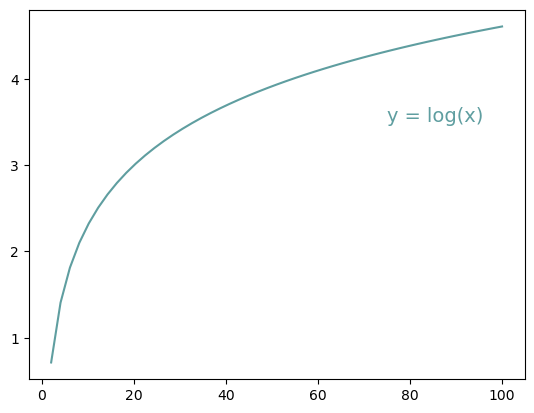

In [32]:
x1 = np.linspace(0,100)
y = np.log(x1)

plt.plot(x1,y, color = 'cadetblue')
plt.yticks([1,2,3,4])
plt.text(75, 3.5, 'y = log(x)', fontsize=14, color='cadetblue')

## 📚  <b> Practice 2. </b> 
Recreate the plot below. You do not need to match the colors exactly, but do not rely on <span class="codeb">matplotlib</span> defaults. Note: do not worry about the equation(s); these are included to indicate which functions to plot.

<img src="./assets/mpl_prac2.png" alt="prac2" width="600"/>

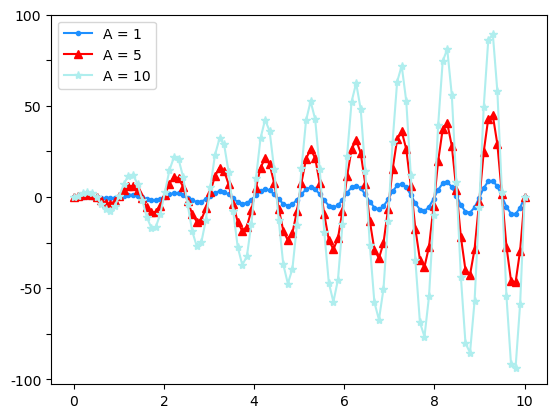

In [33]:
A = [1,5,10]
x = np.linspace(0,10, 100)
y1 = x * np.sin(2 * np.pi * x)
y2 = 5 * x * np.sin(2 * np.pi * x)
y3 = 10 * x * np.sin(2 * np.pi * x)
# colors =['dodgerblue', 'red', 'paleturquoise']
# markers = ['.','^','*']

plt.plot(x,y1, color = 'dodgerblue', marker = '.')
plt.plot(x,y2, color = 'red', marker = '^')
plt.plot(x,y3, color = 'paleturquoise', marker = '*')
plt.yticks([-100, -75,-50, -25, 0 , 25, 50, 75, 100], ['-100','','-50','','0','','50','','100'])
plt.legend(labels=['A = 1','A = 5', 'A = 10'])

## 📚  <b> Practice 3. </b> 

Import the data from `./data/BSRN_data.csv` and plot the temperature and relative humidity over the month of October 2019 at the BSRN station. Be sure to format the timestamps and include axis labels, a title, and a legend, if necessary.



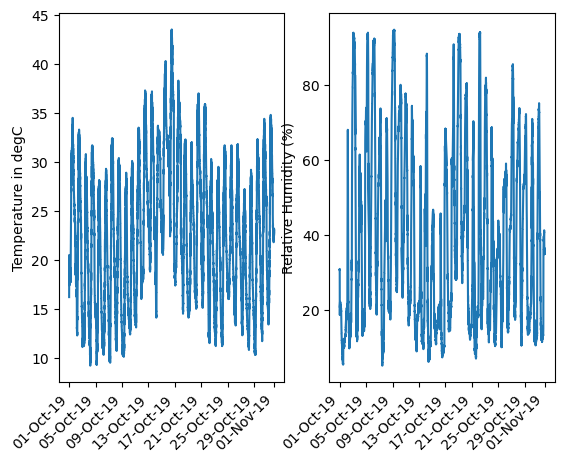

<Figure size 640x480 with 0 Axes>

In [34]:
# Import data
bsrn = pd.read_csv('../data/BSRN_GOB_2019-10.csv',index_col=0,parse_dates=True)
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
# Plot incoming SW radiation
ax.plot(bsrn.index,bsrn.T_degC)
# Label y-axis
ax.set_ylabel(r'Temperature in degC')
# Format timestamps
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
# Format and rotate ticks
plt.setp(ax.get_xticklabels(), rotation=45, fontsize=10, ha='right')
ax.get_xticklabels()

fig2 = plt.figure()
ax2 = fig.add_subplot(1,2,2)
ax2.plot(bsrn.index, bsrn.RH)
ax2.set_ylabel(r'Relative Humidity (%)')
# Format timestamps
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
# Format and rotate ticks
plt.setp(ax2.get_xticklabels(), rotation=45, fontsize=10, ha='right')
ax2.get_xticklabels()

plt.tight_layout()


## 📚 Practice 4.

Saturation vapor pressure, \( $ e^*(T_a) $ \), is the maximum pressure of water vapor that can exist in equilibrium above a flat plane of water at a given temperature. It can be calculated from the Tetens equation:

$$ e^{*}(T_{a}) = a \times exp({\frac{b \cdot T_{a}}{T_{a} + c}}) $$

where $ T_a $ is the air temperature in °C, $ a = 0.611  $ kPa,  $ b = 17.502  $, and  $ c = 240.97 °C  $.

1. Calculate \( $ e^*(T_a) $ \) in kPa for all temperatures in `bsrn`.
1. Plot temperature vs. saturation vapor pressure for the BSRN station. Be sure to format your plot appropriately and include axis labels, a title, and a legend, if necessary.
1. Compare your plot to Figure 3-1 in Campbell and Norman (1998), included below. Do they look more or less the same?

![cn](./assets/campbell_norman_fig3-1.png)


(7.484999999999999, 40.0)

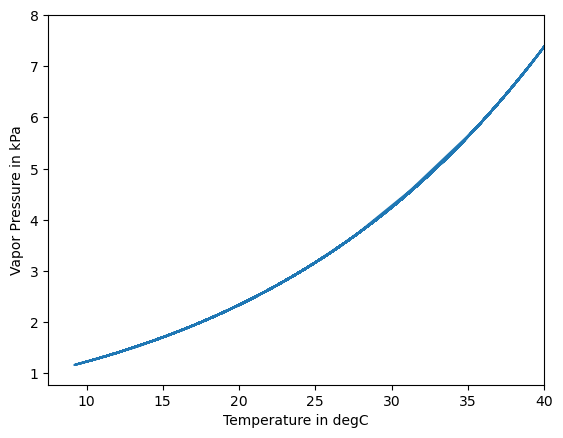

In [51]:
Tmin = bsrn['T_degC'].min()
Tmax = bsrn['T_degC'].max()
#np.linspace(Tmin, Tmax, 30)
T = bsrn.T_degC
a = 0.611
b = 17.502
c = 240.97
eTa = []
for temp in T:
    vp = a*np.exp((b*temp)/(temp+c))
    eTa.append(vp)

plt.plot(T,eTa)
plt.xlabel('Temperature in degC')
plt.ylabel('Vapor Pressure in kPa')
plt.ylim(top=8)
plt.xlim(right = 40)

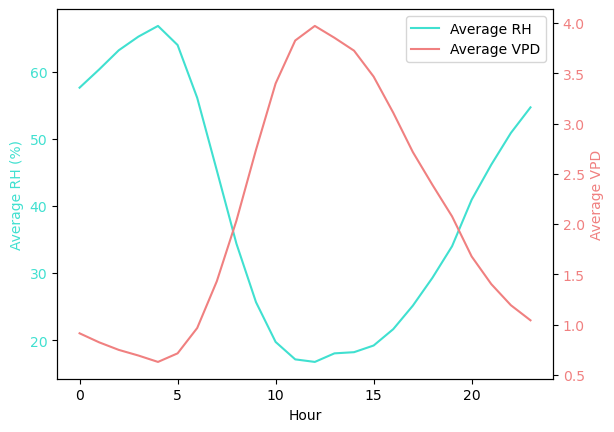

## 📚  <b> Practice 5. </b> 
The difference between saturation vapor pressure and ambient air pressure is called vapor pressure deficit, $\textit{VPD}$. $\textit{VPD}$ can be calculated from saturation vapor pressure and relative humidity, $h_r$, as follows:
$$ \textit{VPD} \, = \, e^*(T_a) \cdot (1 \, - \, h_r)$$
where $h_r$ is expressed as a fraction.

1. Calculate the vapor pressure deficit for the BSRN data.
1. Calculate the mean hourly $RH$ and $\textit{VPD}$ over the entire month.
1. Plot $RH$ and $\textit{VPD}$ as a function of time of day. (for extra python points, try plotting both variables on one plot using [ax.twinx()](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html))
1. How does relative humidity vary throughout the day? Why?
1. Compare your plot(s) to Figure 3-3 in Campbell and Norman (1998). How do the values of $e^*(T_a)$ and $\textit{VPD}$ for the BSRN station compare to those at constant vapor pressure in Figure 3-3?

![cn](./assets/campbell_norman_fig3-3.png)


    hour    avgVPD      avgRH
0      0  0.913082  57.597742
1      1  0.823145  60.316505
2      2  0.748051  63.169946
3      3  0.691976  65.201720
4      4  0.628364  66.796290
5      5  0.713694  63.951290
6      6  0.965578  56.088495
7      7  1.430703  45.279624
8      8  2.033165  34.377043
9      9  2.738815  25.648226
10    10  3.398647  19.727903
11    11  3.826057  17.133548
12    12  3.971045  16.754194
13    13  3.853143  18.029624
14    14  3.724832  18.204462
15    15  3.466522  19.198387
16    16  3.107507  21.635484
17    17  2.715933  25.137419
18    18  2.389440  29.289892
19    19  2.075986  33.983495
20    20  1.677347  40.911559
21    21  1.402646  46.130323
22    22  1.192536  50.855430
23    23  1.042340  54.666774


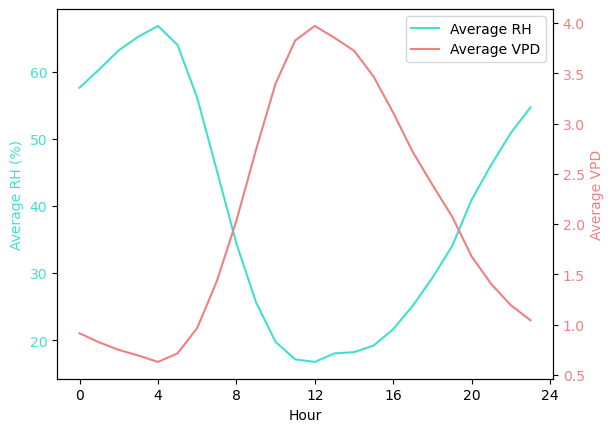

In [82]:
VPD = []
for i,rh in enumerate(bsrn.RH):
    vapdef = (eTa[i])*(1-(rh/100))
    VPD.append(vapdef)

vap = []

bsrn['VPD'] = VPD


for h in bsrn.index.hour.unique():
    avgVPD = bsrn.VPD[bsrn.index.hour == h].mean()
    avgRH = bsrn.RH[bsrn.index.hour == h].mean()  
    vap.append([h,avgVPD,avgRH])

hourly_vap = pd.DataFrame(vap, columns = ['hour', 'avgVPD', 'avgRH'])
#print(hourly_vap)

# plt.plot(hourly_vap.hour, hourly_vap.avgRH)
# plt.plot(hourly_vap.hour, hourly_vap.avgVPD)

# Create a Matplotlib figure and the first axis (ax1) for avgRH
fig, ax1 = plt.subplots()

# Plot avgRH on ax1 with turquoise color
ax1.plot(hourly_vap.hour, hourly_vap.avgRH, color='turquoise', label='Average RH')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Average RH (%)', color='turquoise')
ax1.tick_params(axis='y', labelcolor='turquoise')

# Create a second axis (ax2) sharing the same x-axis as ax1
ax2 = ax1.twinx()

# Plot avgVPD on ax2 with light coral color
ax2.plot(hourly_vap.hour, hourly_vap.avgVPD, color='lightcoral', label='Average VPD')
ax2.set_ylabel('Average VPD', color='lightcoral')
ax2.tick_params(axis='y', labelcolor='lightcoral')

# Set the x-axis limit for both ax1 and ax2
ax1.set_xticks(np.linspace(0,24,7))

# Add legends for both plots
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper right')

print(hourly_vap)

<hr style="border-top: 1px solid gray; margin-top: 24px; margin-bottom: 1px"></hr>